         Word  Count  Compound
5    hospital     16 -0.235794
49       nice     11  0.373227
61        not      9 -0.102044
32         go      8 -0.071163
78       well      8  0.180325
2        wait      7 -0.508243
14     doctor      7  0.023686
48    sisters      7  0.413714
10    waiting      6 -0.711250
28     corona      6 -0.020550
86      child      6  0.196167
179     going      5  0.366960
54       like      5  0.038280
62    allowed      5 -0.051940
73       room      5 -0.492080
         Word  Count  Compound
283      cunt      5 -0.943200
10    waiting      6 -0.711250
2        wait      7 -0.508243
73       room      5 -0.492080
5    hospital     16 -0.235794
61        not      9 -0.102044
32         go      8 -0.071163
62    allowed      5 -0.051940
28     corona      6 -0.020550
14     doctor      7  0.023686
163    helped      5  0.026500
54       like      5  0.038280
78       well      8  0.180325
86      child      6  0.196167
90       good      5  0.259620


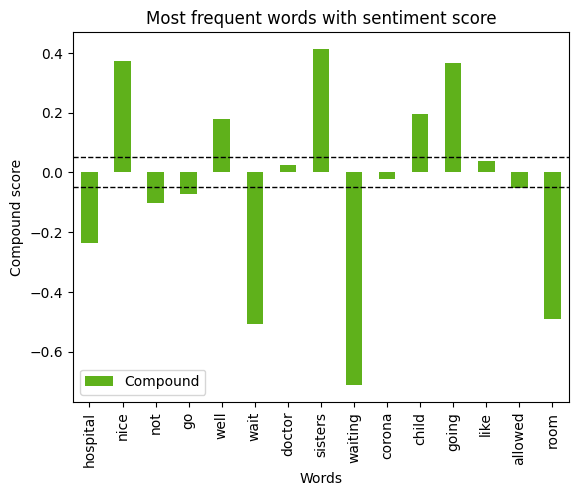

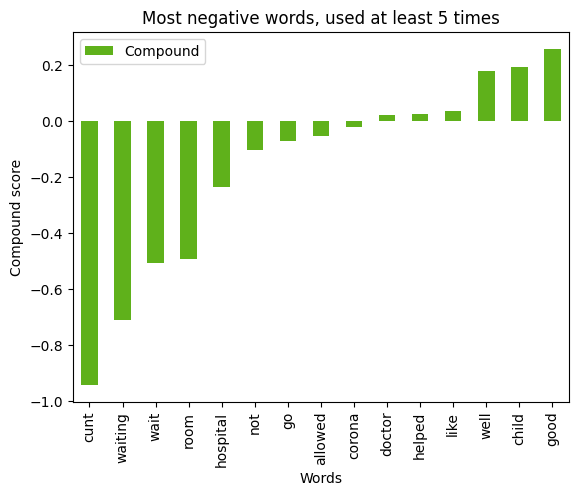

In [1]:
import pandas as pd
from deep_translator import (GoogleTranslator,
                             PonsTranslator,
                             LingueeTranslator,
                             MyMemoryTranslator,
                             YandexTranslator,
                             single_detection,
                             batch_detection)
import nltk
import string as st
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import CleanupFunctions as clean
import AddedWords
import WordsSentiment

# Haalt info uit csv op.
dfDutch = pd.read_csv("CSVFiles/Mock-updata.csv", sep=';')

dfSentiment = pd.DataFrame.from_dict({
    "id":[],
    "text": [],
    "compound": [],
    "neg":[],
    "neu":[],
    "pos":[],
})

index = 0

stopwords = nltk.corpus.stopwords.words("english")

sia = SentimentIntensityAnalyzer()
# Update de woordenlijst, met zelftoegevoegde woorden en het sentiment, bron: https://ithaka.github.io/tdm-notebooks/sentiment-analysis-with-vader.html
sia.lexicon.update(AddedWords.added_words())


#Loop die er voor zorgt dat alle vertaalde reviews wordt uitgeprint
for col_name, review in dfDutch.iterrows():
    translated = GoogleTranslator(source='dutch', target='english').translate(text=dfDutch.loc[col_name]['Tekst'])
    textlowercase = clean.convert_to_lowercase(translated)
    textclean = clean.punc_clean(textlowercase)
    textstopword = clean.remove_stopword(textclean)
    tokenized = sent_tokenize(textstopword)
    for line in tokenized:     
        ss = sia.polarity_scores(line)
        compound = ss["compound"]
        dfTemp = pd.DataFrame.from_dict({
                            "id":[col_name],
                            "text": [textstopword],
                            "compound": [compound],
                            "neg":[ss["neg"]],
                            "neu":[ss["neu"]],
                            "pos":[ss["pos"]],
                            })
        index = index + 1

        WordsSentiment.words_sentiment(compound, line)
                
    dfSentiment = pd.concat([dfSentiment, dfTemp], ignore_index=True)

WordsSentiment.print_graphs()









In [21]:
dfSentimentZGV = pd.read_csv("CSVFiles\ZGVDataSentiment.csv")
dfSentimentMockUp = pd.read_csv("CSVFiles\MockUpDataSentiment.csv")

dfTotal = pd.concat([dfSentimentMockUp, dfSentimentZGV], ignore_index=True);

dfTotal.to_csv("CSVFiles/SentimentTotal.csv", sep=';')
